In [22]:
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras import activations
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [23]:
img = image.load_img("/content/drive/MyDrive/sinhala_img/train/ර/ර_21.jpg")

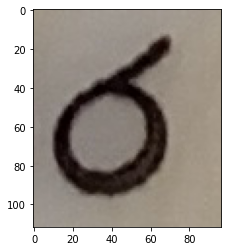

In [24]:
plt.imshow(img)

In [25]:
cv2.imread("/content/drive/MyDrive/sinhala_img/train/ර/ර_21.jpg")

array([[[137, 152, 161],
        [137, 152, 161],
        [138, 153, 162],
        ...,
        [141, 156, 165],
        [141, 156, 165],
        [143, 157, 169]],

       [[136, 151, 160],
        [135, 150, 159],
        [135, 150, 159],
        ...,
        [140, 155, 164],
        [138, 153, 162],
        [140, 154, 166]],

       [[137, 152, 161],
        [134, 149, 158],
        [133, 148, 157],
        ...,
        [141, 156, 165],
        [139, 154, 163],
        [139, 154, 163]],

       ...,

       [[143, 151, 158],
        [145, 153, 160],
        [144, 152, 159],
        ...,
        [135, 153, 164],
        [137, 155, 166],
        [135, 153, 164]],

       [[142, 150, 157],
        [144, 152, 159],
        [143, 151, 158],
        ...,
        [135, 153, 164],
        [135, 153, 164],
        [135, 153, 164]],

       [[142, 150, 157],
        [143, 151, 158],
        [143, 151, 158],
        ...,
        [136, 154, 165],
        [135, 153, 164],
        [137, 155, 166]]

In [26]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [27]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/sinhala_img/train',
                                    target_size= (200,200),
                                    batch_size = 3,
                                    class_mode = 'binary')

Found 110 images belonging to 5 classes.


In [28]:
validation_dataset = train.flow_from_directory('/content/drive/MyDrive/sinhala_img/validation',
                                    target_size= (200,200),
                                    batch_size = 3,
                                    class_mode = 'binary')

Found 110 images belonging to 5 classes.


In [29]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape =(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    #
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation='softmax')
                                    ])

In [30]:
model.compile(loss= 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy'])

In [31]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 20,
                      epochs = 5,
                      validation_data = validation_dataset)

Epoch 1/5
20/20 [==============================] - 2s 48ms/step - loss: -2321.0450 - accuracy: 0.1315 - val_loss: -56253.5586 - val_accuracy: 0.2091
Epoch 2/5
20/20 [==============================] - 1s 27ms/step - loss: -257533.6107 - accuracy: 0.2092 - val_loss: -1133718.5000 - val_accuracy: 0.2091
Epoch 3/5
20/20 [==============================] - 1s 26ms/step - loss: -1497513.4461 - accuracy: 0.2626 - val_loss: -4442264.5000 - val_accuracy: 0.2091
Epoch 4/5
20/20 [==============================] - 1s 28ms/step - loss: -6637524.3571 - accuracy: 0.2271 - val_loss: -11675615.0000 - val_accuracy: 0.2091
Epoch 5/5
20/20 [==============================] - 1s 27ms/step - loss: -17039038.5714 - accuracy: 0.1558 - val_loss: -27728162.0000 - val_accuracy: 0.2091


In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33856)            

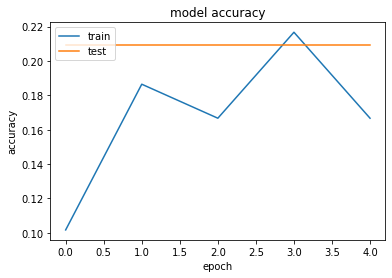

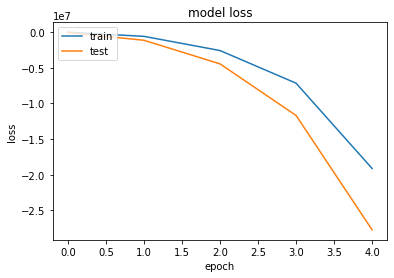

In [34]:
# summarize history for accuracy
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
# Save the model
filepath = './saved_model'
save_model(model, filepath)

INFO:tensorflow:Assets written to: ./saved_model/assets


In [15]:
model.save('latest.model')

INFO:tensorflow:Assets written to: latest.model/assets


In [ ]:
def prepare(filepath):
    IMG_SIZE=100
    img_array=cv2.imread(filepath)
    img_array = img_array/255.0
    new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,3)

model=tf.keras.models.load_model("latest.model")
prediction=model.predict([prepare('/content/drive/MyDrive/sinhala_img/test/1.PNG')])
print(prediction)